<h1 style='font-size:3rem;color:maroon;'><u>Neural Networks for Predicting Housing Prices</u>

## 1 -  <u>Packages</u>

In [17]:
import shap
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, ReLU
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## 2 - <u>Data Loading and Preprocessing</u>

### 2.1 Load Housing Data

In [18]:
# Load dataset
# Using the data from the .csv file provided

data = pd.read_csv("D:/Data Analytics Courses/3rd Semester - Spring 2025/Course Materials/DAT 514/datasets/housing1.csv")
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values  # Labels

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1000, 3)
Shape of y: (1000,)


### 2.2 Dataset Description

The dataset used in this project contains 1000 rows of real housing data.  Each row corresponds to a unique property with different features and a target value representing the price of the house. 

The dataset includes:

- Features (X):  The dataset includes three features (input variables) that describe the attributes of each house. These three features are used to model the relationship with the target variable (house price).
- Target Variable (Y): The label or target variable represents the price of the house

### 2.3 Split the Data

In [19]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.4 Normalization of Data

In [20]:
from sklearn.preprocessing import StandardScaler

# Normalize X
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Normalize y
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

## 3 - <u>Neural Network Design</u>

In [21]:
# Define the model
model = Sequential([
        Dense(64, input_dim=3, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1) # Output layer for regression
])

# Compile the Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_error',
    metrics=['mae']
)

### 3.1 Neural Network Architecture Description

The neural network architecture in the code consists of 3 layers: an input layer, two hidden layers, and an output layer.  The input layer takes in three features; size, location score, and the number of bedrooms.  Thus the input dimension (input_dim=3) is specified, which corresponds to the three features.  The first hidden layer consists of 64 units, which are neurons that learn patterns from the data.  The second hidden layer consists of 32 units and helps the model capture more abstract relationships between the input features and the target variable.  Both layers use the ReLU activation function. Lastly, the output layer contains a single neuron with no activation function.

## 4 - <u>Training and Evaluation</u>

### 4.1 Train the model

In [22]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32
)

Epoch 1/50
20/20 [==============================] - 0s 10ms/step - loss: 0.2233 - mae: 0.3329 - val_loss: 0.0719 - val_mae: 0.2163
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0524 - mae: 0.1867 - val_loss: 0.0492 - val_mae: 0.1882
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0428 - mae: 0.1719 - val_loss: 0.0449 - val_mae: 0.1779
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0427 - mae: 0.1733 - val_loss: 0.0497 - val_mae: 0.1895
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0412 - mae: 0.1682 - val_loss: 0.0477 - val_mae: 0.1801
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0417 - mae: 0.1725 - val_loss: 0.0445 - val_mae: 0.1791
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0405 - mae: 0.1661 - val_loss: 0.0451 - val_mae: 0.1814
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0394 - mae: 0.1

### 4.2 Evaluating the Model

In [23]:
# Evaluate on the test set
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

7/7 [==============================] - 0s 1ms/step - loss: 0.0422 - mae: 0.1699
Test Loss: 0.0422, Test MAE: 0.1699


## 5 - <u>Predicting and Reporting</u>

### 5.1 Make Predictions

In [24]:
predictions = model.predict(X_test)

7/7 [==============================] - 0s 833us/step


### 5.2 Visualize Predictions

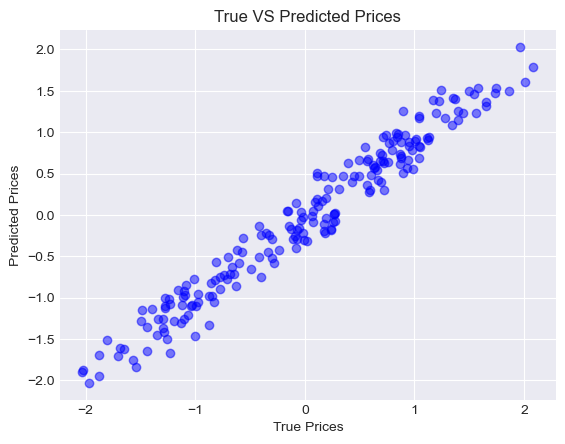

In [25]:
# Plot true vs Predicted Prices
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True VS Predicted Prices')
plt.show()

### 5.3 Feature Importance Analysis

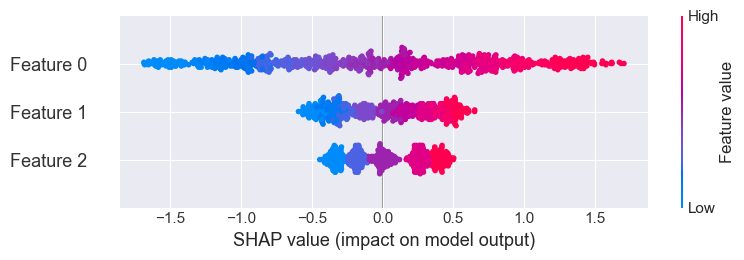

In [28]:

# Train RandomForest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Use SHAP for feature importance
explainer = shap.Explainer(model, X_train)  # Use TreeExplainer for tree-based models
shap_values = explainer(X_train, check_additivity=False)  # Get SHAP values

# Summary plot for feature importance
shap.summary_plot(shap_values, X_train)


## 6 - <u>Insights from Models Performance</u>

The models performance over the course of 50 epochs provides valuable insights into its ability to learn and generalize from the data.  Throughout the 50 epochs, the training loss consistently decreases, starting at 0.2233 in the first epoch and dropping to 0.0379 by the 50th epoch.  Similiarly, the training MAE, which measures the average magnitude of the errors in predictions, decreases from 0.3329 in the first epoch to 0.1598 by the end.  This steady improvement indicates that the model is learning effectively from the training data and refining its ability to make more predictions over time.  In contrast, the validation loss (val_loss) fluctuates around 0.045, with the final validatioon loss recorded at 0.0487.  The validation MAE begins at 0.2163 and decreases to 0.1830, and showing a slight improvement over the epochs.  While the validation performance shows a general downward trend, it is not as smooth as the training performance, with some fluctuations in both loss and MAE across epochs.  When evaluated on the test data, the model achieves a loss of 0.0422 and an MAE of 0.1699.  These values are relatively close to the validation metrics, which suggests that the model generalizes well to new data.  

### 6.1 Overfitting or Underfitting
The model does not exhibit signs of overfitting.  Overfitting would typically be observed if the training loss continued to decreasae significantly while validation loss stagnated or worsened.  However, in this case, both the training and validation losses follow similar trends, indicating that the model is not memorizing the training data.  The performance on the validation set is consistent with the training set, suggesting that the model is not overfitting. Likewise, the model does not exhibit signs of underfitting, as underfitting would be indicated by high training and validation loss values.  In this case, the loss values for both training and validation sets are relatively low, which demonstrates that the model is successfully capturing the patterns in the data, indicating it is not underfitting.

### 6.2 Feature Importance Analysis
The feature importance analysis reveals that feature 0(size) has the highest impact on predictions followed by feature 1 (location_score) and feature 2 (bedrooms).  from the SHAP summary plot we can see that all the features and their colorings span both the right(+ve) and left(-ve) sides of the plot.  This indicates that the features have a bimodal effect on the predictions depending on the specific value it takes.  For instance, when feature 0, 1 or 2 takes a lower value, it could decrease the models prediction, hence the features have varying impacts across different instances in the dataset. This dual coloring of all the features likely means that interact with the target variable in a complex way.